# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as df2.
# Import save/modified csv
df3 = pd.read_csv('/Users/reflet/Desktop/C3_Assignment 3 - Submission/customers.csv')

# View DataFrame.
df3.head()

,gender,age,renumeration,score,loyalty_points
0,Male,18,12.30,39,210
1,Male,23,12.30,81,524
2,Female,22,13.12,6,40
3,Female,25,13.12,77,562
4,Female,33,13.94,40,366


In [3]:
# Drop unnecessary columns.
df3 = df3[['gender','renumeration','score']]

# View DataFrame.
df3.head()

,gender,renumeration,score
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40


gender          0
renumeration    0
score           0
dtype: int64

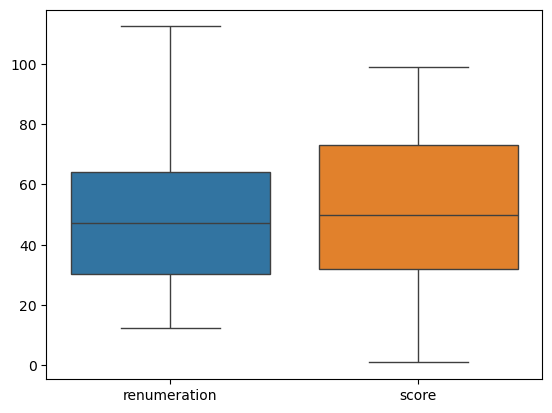

In [4]:
# Explore the data.
sns.boxplot(data=df3)
df3.isnull().sum()

<Axes: xlabel='score', ylabel='Count'>

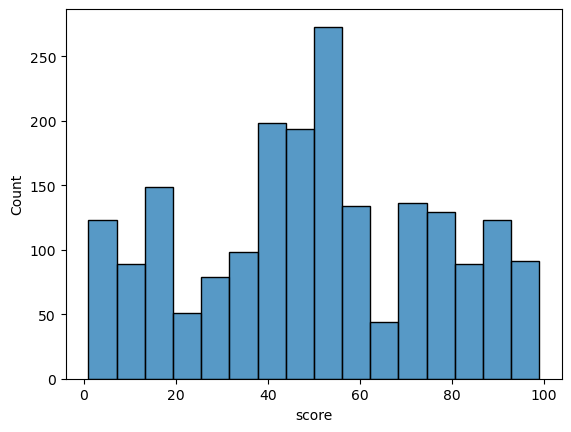

In [5]:
# Explore the data.
sns.histplot(data=df3, x='score')


gender          0
renumeration    0
score           0
dtype: int64

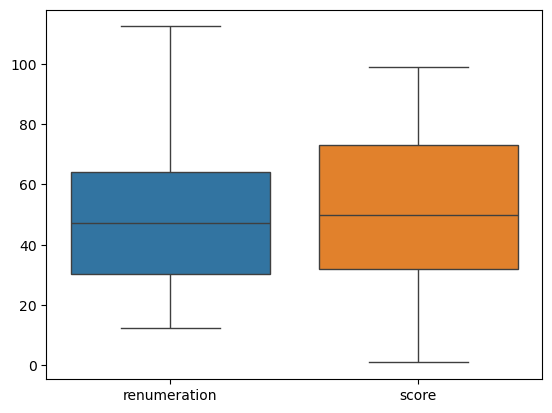

In [6]:
# Explore the data.
sns.boxplot(data=df3)
df3.isnull().sum()

In [7]:
# Descriptive statistics.
df3.describe()

,renumeration,score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='renumeration', ylabel='score'>

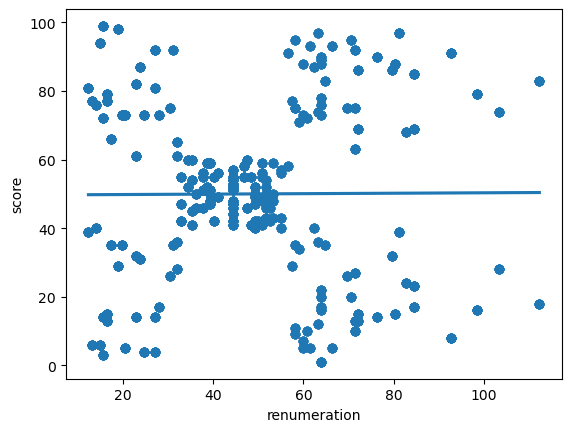

In [8]:
# Create a scatterplot with Seaborn.
sns.regplot(data=df3, x='renumeration', y='score', ci=False)

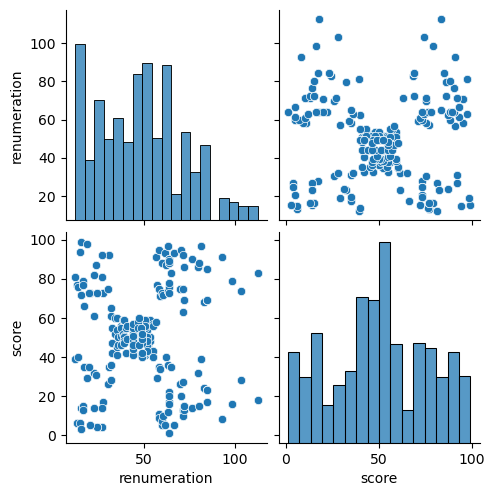

In [9]:
# Create a pairplot with Seaborn.
sns.pairplot(data=df3)

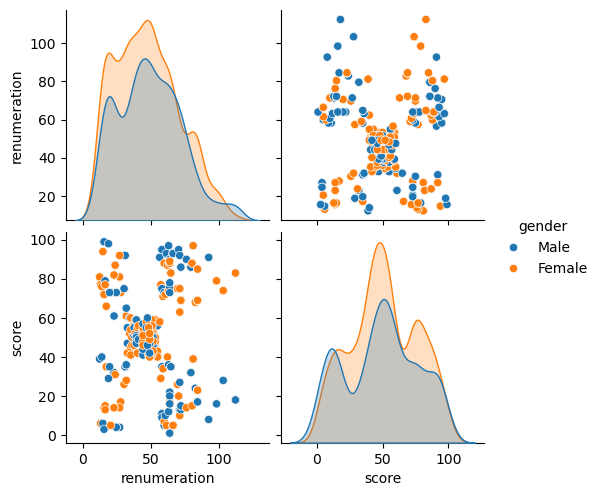

In [10]:
# Pairplot with gender for better clustering
sns.pairplot(data=df3, hue='gender')

## 3. Elbow and silhoutte methods

In [11]:
# Subset income & score
df4 = df3[['renumeration', 'score']]

# Verify
df4.head()

,renumeration,score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


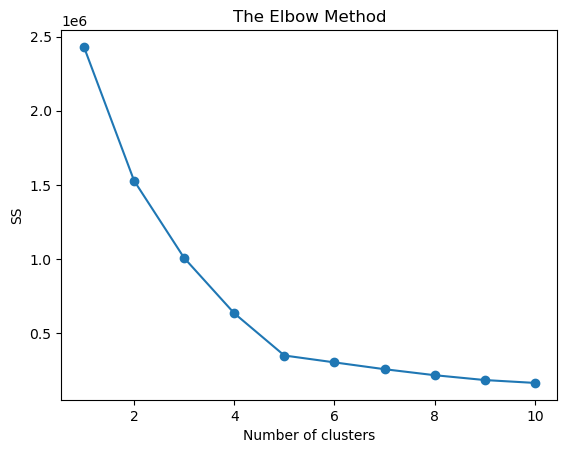

In [12]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.

# User function to transform k-means data
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df4)
    ss.append(kmeans.inertia_)

# Plot elbow chart
plt.plot(range(1, 11),
         ss,
         marker='o')

# Labels
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# View
plt.show()

In [13]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df4)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df4,
                                labels,
                                metric = 'euclidean'))


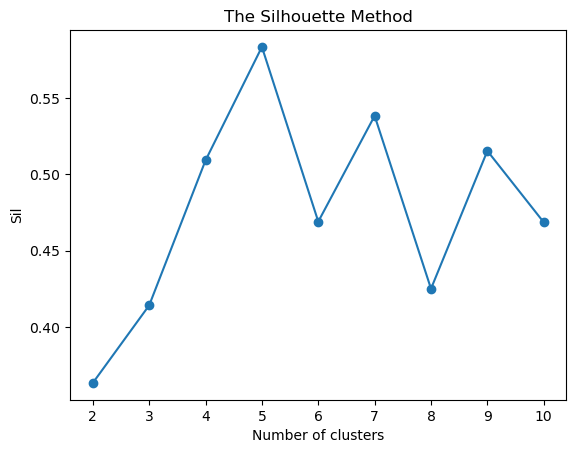

In [14]:
# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Labels for plot
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# View
plt.show()

## 4. Evaluate k-means model at different values of *k*

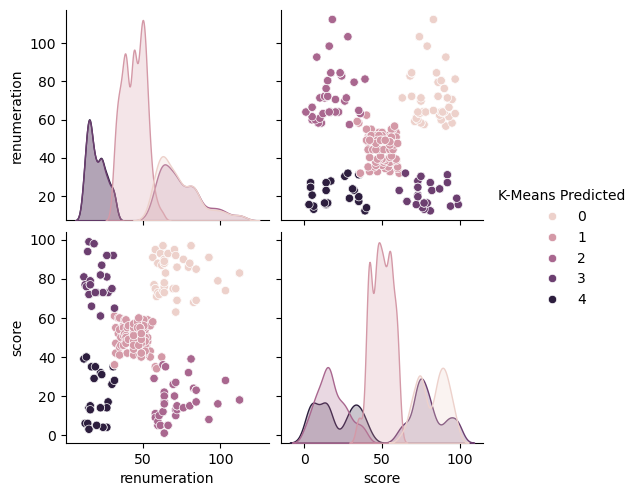

In [15]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 10,
                init='k-means++',
                random_state=42).fit(df4)

clusters = kmeans.labels_
df4['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df4,
             hue='K-Means Predicted',
             diag_kind= 'kde')

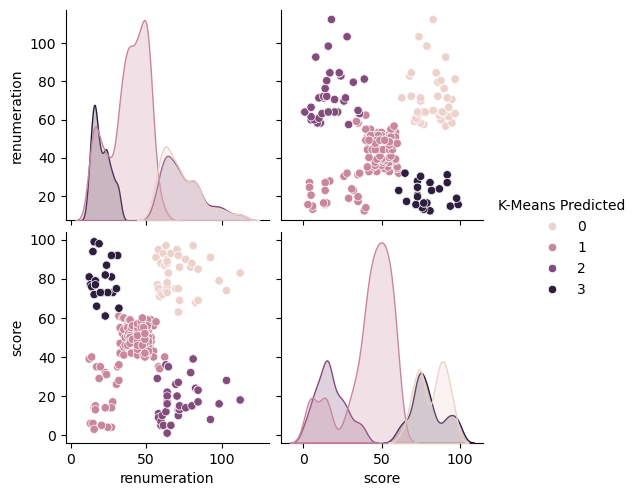

In [16]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 10,
                init='k-means++',
                random_state=42).fit(df4)

clusters = kmeans.labels_
df4['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df4,
             hue='K-Means Predicted',
             diag_kind= 'kde')

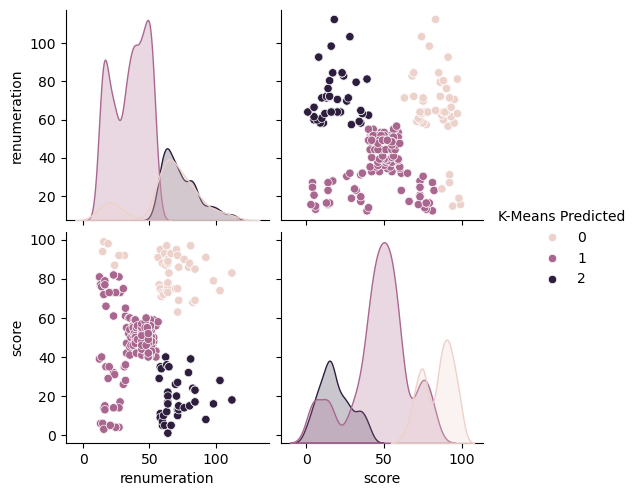

In [17]:
# Use 3 clusters:
kmeans = KMeans(n_clusters = 3,
                max_iter = 10,
                init='k-means++',
                random_state=42).fit(df4)

clusters = kmeans.labels_
df4['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df4,
             hue='K-Means Predicted',
             diag_kind= 'kde')

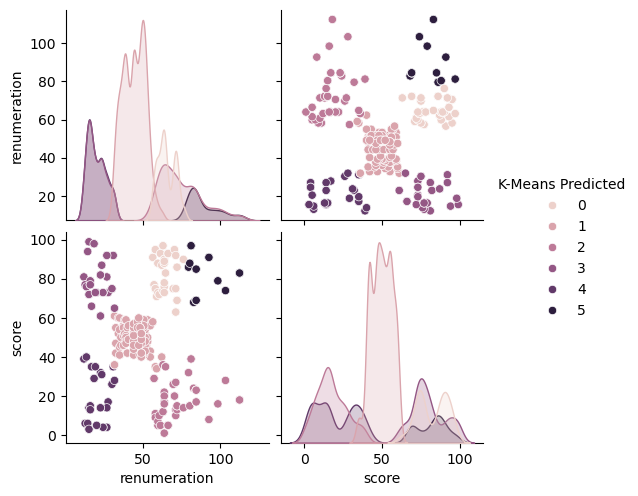

In [18]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 10,
                init='k-means++',
                random_state=42).fit(df4)

clusters = kmeans.labels_
df4['K-Means Predicted'] = clusters
# Plot the predicted.
sns.pairplot(df4,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model

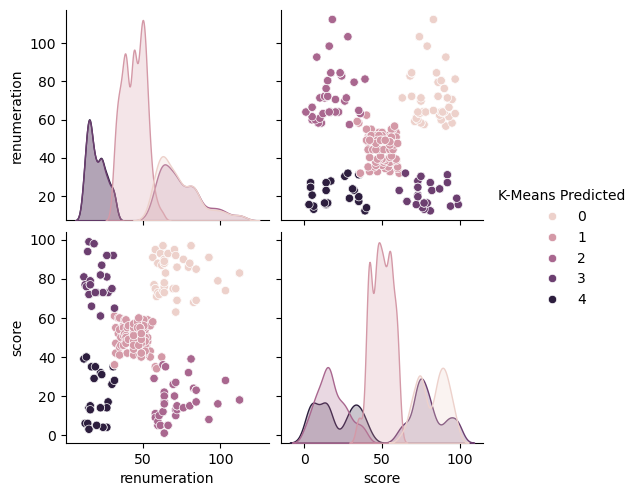

In [19]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 10,
                init='k-means++',
                random_state=42).fit(df4)

clusters = kmeans.labels_
df4['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df4,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [20]:
# Check the number of observations per predicted class.
df4['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [21]:
# Visualising the clusters.
print(df4.head())

# View the DataFrame.
df4.head()

   renumeration  score  K-Means Predicted
0         12.30     39                  4
1         12.30     81                  3
2         13.12      6                  4
3         13.12     77                  3
4         13.94     40                  4


,renumeration,score,K-Means Predicted
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4


<Axes: xlabel='renumeration', ylabel='score'>

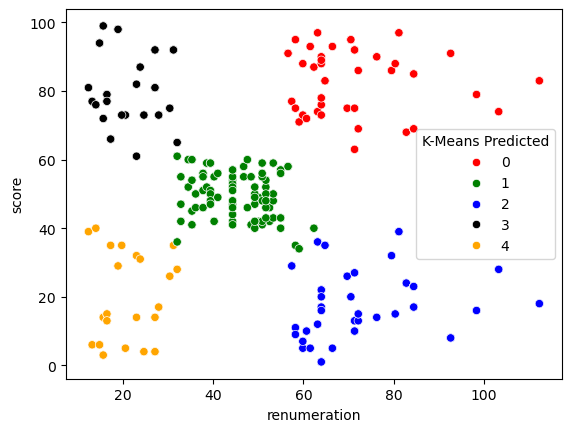

In [22]:
# Visualising the clusters.
sns.scatterplot(x='renumeration' , 
                y ='score',
                data=df4 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
